<a href="https://colab.research.google.com/github/aaubs/ds-master/blob/main/notebooks/M3_Exercise_Session_1_ANN_Pytorch_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

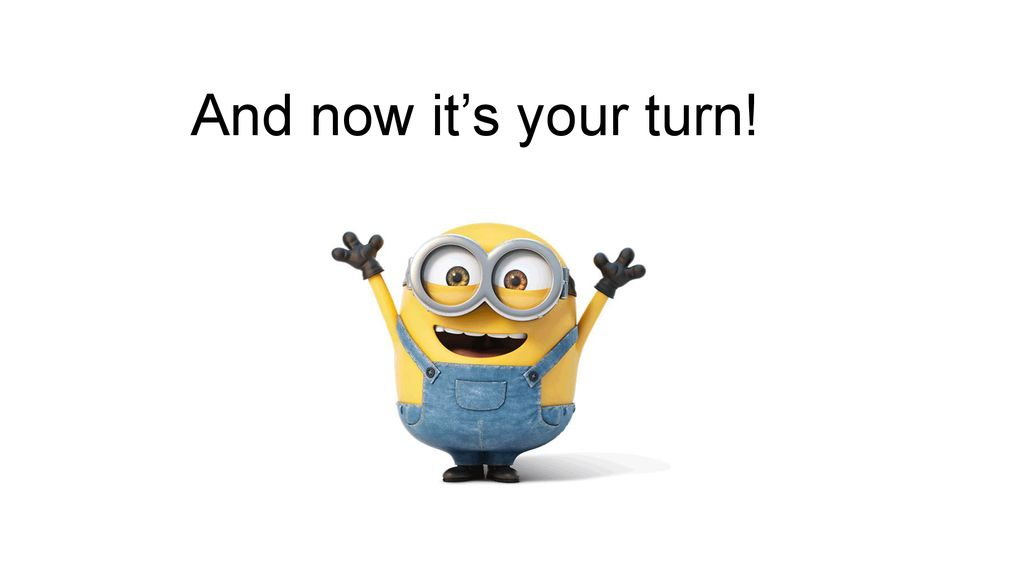

Train ANN through Swedish Auto Insurance with 1 or 2 hidden layers!

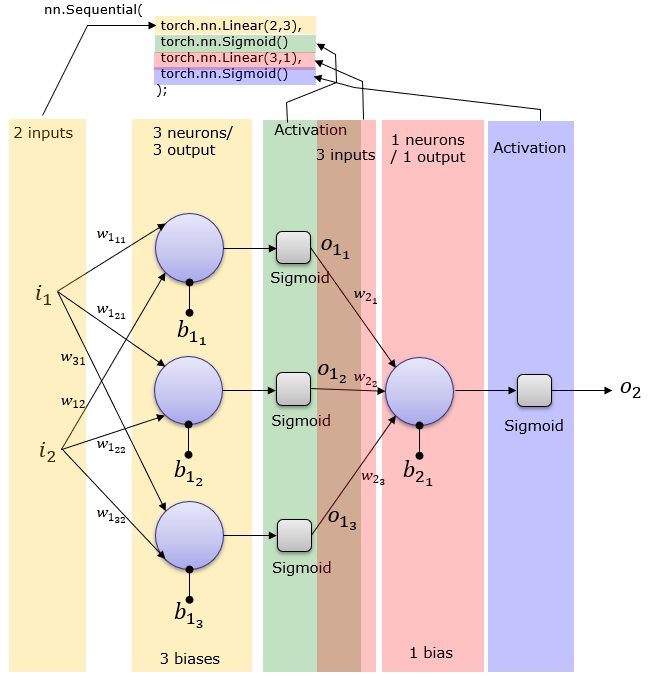

In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(torch.nn.Linear(1,3),
                                 torch.nn.ReLU(),
                                 torch.nn.Linear(3,1),
                                 torch.nn.ReLU()
                                 );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)


for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-419-fcfbc58db281>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 7129.189453125
Loss: 1344.515380859375
Loss: 1313.4482421875
Loss: 1301.725341796875
Loss: 1298.550537109375
Loss: 1298.556884765625
Loss: 1299.4228515625
Loss: 1300.304443359375
Loss: 1300.9771728515625
Loss: 1301.43310546875


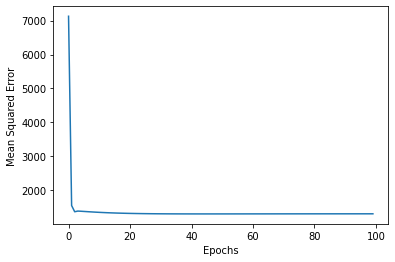

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()